<a href="https://colab.research.google.com/github/vishnaka-dasanayaka/CVIP_Ass_2/blob/main/Take_home_assignment_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [19]:
def region_growing(image, seeds, threshold):
    rows, cols = image.shape
    segmented = np.zeros_like(image)
    for seed in seeds:
        stack = [seed]
        while stack:
            current_pixel = stack.pop()
            row, col = current_pixel
            if segmented[row, col] == 0 and abs(image[row, col] - image[seed]) <= threshold:
                segmented[row, col] = 255
                if row + 1 < rows:
                    stack.append((row + 1, col))
                if row - 1 >= 0:
                    stack.append((row - 1, col))
                if col + 1 < cols:
                    stack.append((row, col + 1))
                if col - 1 >= 0:
                    stack.append((row, col - 1))
    return segmented

In [20]:
# Generate synthetic image with 2 objects
image = np.zeros((100, 100), dtype=np.uint8)
image[20:40, 20:40] = 100
image[60:80, 60:80] = 200


In [21]:
# Define seeds inside the objects
seeds = [(25, 25), (70, 70)]

In [22]:
# Apply region growing segmentation
segmented_image = region_growing(image, seeds, threshold=65)

<ipython-input-19-76b50078ff81>:9: RuntimeWarning: overflow encountered in scalar subtract
  if segmented[row, col] == 0 and abs(image[row, col] - image[seed]) <= threshold:


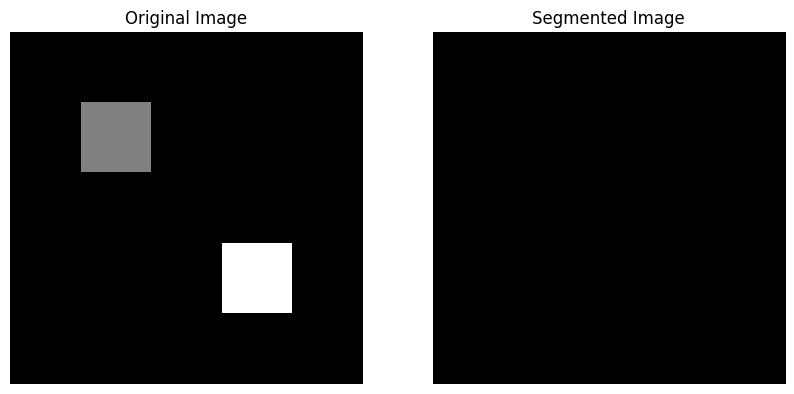

In [23]:
# Display results using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()